In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

# 1) Reading the dataset and dropping null values:


In [50]:
df = pd.read_csv("airline_passengers.csv")#parse_dates = ['Month'], index_col='Month')

df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [51]:
df.isna().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [53]:
df.dropna(inplace=True)

In [55]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month',inplace=True)

In [56]:
df

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


# 2) decompostition of the series:

In [57]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL

Text(0.5, 1.0, 'Thousands of Passengers Cycle')

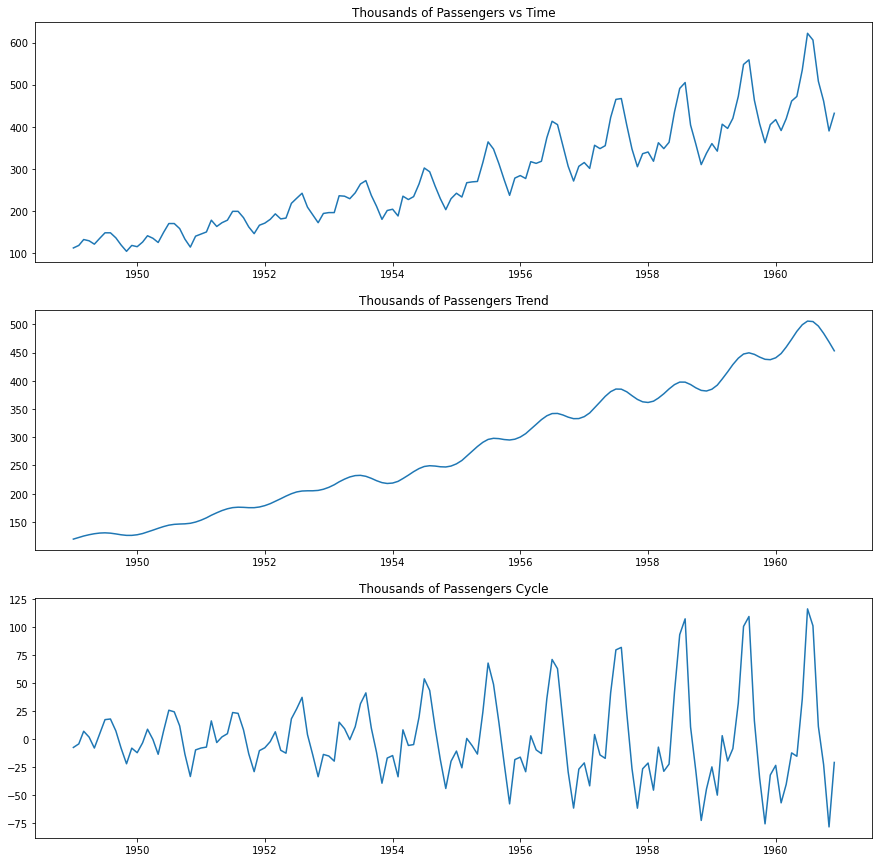

In [58]:
series = df['Thousands of Passengers']


cycle, trend = sm.tsa.filters.hpfilter(series, 50)

# (series, value): value stands for how smooth you want the filter to be
# higher the value, smoother the curve

fig, ax = plt.subplots(3,1,figsize=(15,15))
ax[0].plot(series)
ax[0].set_title("Thousands of Passengers vs Time")
ax[1].plot(trend)
ax[1].set_title("Thousands of Passengers Trend")
ax[2].plot(cycle)
ax[2].set_title("Thousands of Passengers Cycle")

<AxesSubplot:xlabel='Month'>

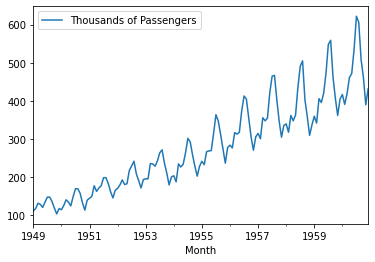

In [59]:
df.plot()

# 3) is the time series stationary? making the time series stationary:

In [60]:
df.head(15)

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
1949-07-01,148.0
1949-08-01,148.0
1949-09-01,136.0


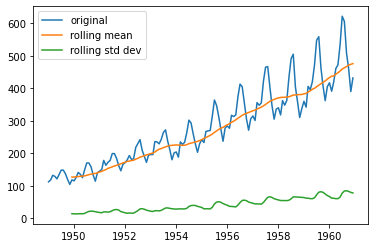

In [61]:
rolling_mean = df.rolling(window=12).mean()
rolling_stdev = df.rolling(window=12).std()

plt.plot(df, label = 'original')
plt.plot(rolling_mean, label = 'rolling mean')
plt.plot(rolling_stdev, label = 'rolling std dev')
plt.legend()
plt.show()

# the rolling mean has a trend, hence it is not stationary

In [62]:
# Dickey Fuller test:

from statsmodels.tsa.stattools import adfuller

fuller_result = adfuller(df['Thousands of Passengers'])
fuller_result

(0.8153688792060433,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [63]:
print("p value: ", fuller_result[1])
print("")
if fuller_result[1] < 0.05:
    print("REJECT HO: time series is stationary")
else:
    print("DO NOT REJECT HO: time series is not stationary")

p value:  0.9918802434376409

DO NOT REJECT HO: time series is not stationary


In [64]:
# differencing to make the time series stationary:
# second difference makes time series stationary

df['second difference'] = df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(2)
df

,Thousands of Passengers,second difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,NaN
1949-03-01,132.0,20.0
1949-04-01,129.0,11.0
1949-05-01,121.0,-11.0
...,...,...
1960-08-01,606.0,71.0
1960-09-01,508.0,-114.0
1960-10-01,461.0,-145.0


In [65]:
# dickey fuller test:

fuller_result = adfuller(df['second difference'].dropna())
print("p value: ", fuller_result[1])
print("")
if fuller_result[1] < 0.05:
    print("REJECT HO: time series is stationary")
else:
    print("DO NOT REJECT HO: time series is not stationary")

p value:  0.038629757676988195

REJECT HO: time series is stationary


<AxesSubplot:xlabel='Month'>

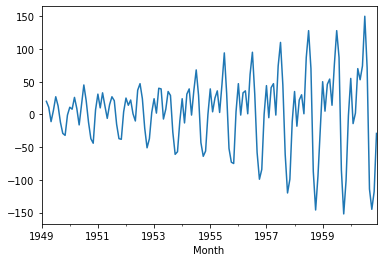

In [66]:
df['second difference'].plot()

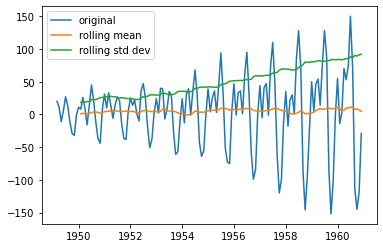

In [67]:
rolling_mean = df['second difference'].rolling(window=12).mean()
rolling_stdev = df['second difference'].rolling(window=12).std()

plt.plot(df['second difference'], label = 'original')
plt.plot(rolling_mean, label = 'rolling mean')
plt.plot(rolling_stdev, label = 'rolling std dev')
plt.legend()
plt.show()

In [76]:
# since the data has seasonality, we will also take the seasonal first difference

df['seasonal difference'] = df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(12)

# dickey fuller test:

fuller_result = adfuller(df['seasonal difference'].dropna())
print("p value: ", fuller_result[1])
print("")
if fuller_result[1] < 0.05:
    print("REJECT HO: time series is stationary")
else:
    print("DO NOT REJECT HO: time series is not stationary")

p value:  0.011551493085514952

REJECT HO: time series is stationary


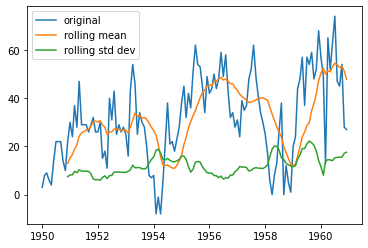

In [78]:
rolling_mean = df['seasonal difference'].rolling(window=12).mean()
rolling_stdev = df['seasonal difference'].rolling(window=12).std()

plt.plot(df['seasonal difference'], label = 'original')
plt.plot(rolling_mean, label = 'rolling mean')
plt.plot(rolling_stdev, label = 'rolling std dev')
plt.legend()
plt.show()

# 4) Autorcorrelation:

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

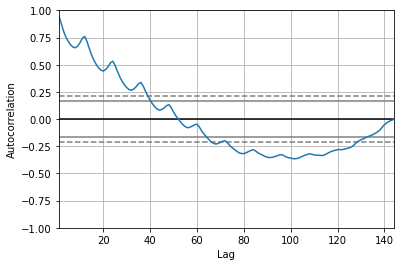

In [68]:
from pandas.plotting import autocorrelation_plot


autocorrelation_plot(df['Thousands of Passengers'])

In [69]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

C:\Users\Josh\anaconda3\envs\SignLangauge\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


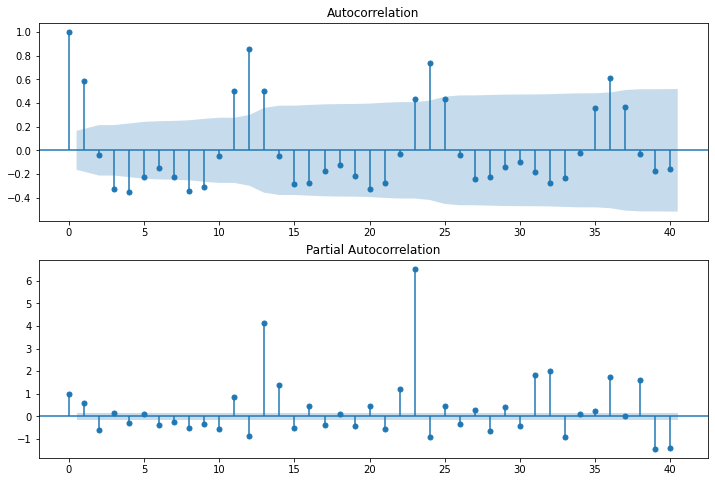

In [70]:
# feeding in second difference:

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['second difference'].iloc[2:],lags=40,ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['second difference'].iloc[2:],lags=40,ax=ax2)

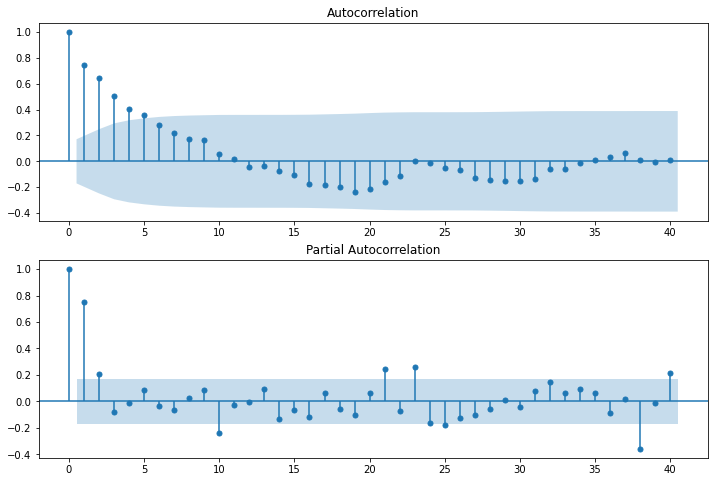

In [80]:
# feeding in seasonal difference:

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['seasonal difference'].iloc[12:],lags=40,ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['seasonal difference'].iloc[12:],lags=40,ax=ax2)

In [81]:
# using pmdarima to get the best model
import pmdarima as pmd

def arimamodel(timeseries):
    auto_arima_model = pmd.auto_arima(timeseries,
                                     start_p=1, start_q=1,
                                     test="adf",
                                     trace=True)
    return auto_arima_model

In [82]:
arima_model = arimamodel(df['Thousands of Passengers'])
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1409.748, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1790.368, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1428.179, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2057.847, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1408.249, Time=0.23 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1413.639, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1408.287, Time=0.33 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1408.344, Time=0.43 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1411.050, Time=0.28 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1410.342, Time=0.27 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1410.569, Time=0.15 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 2.760 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(2, 0, 1)   Log Likelihood                -699.125
Date:                Thu, 04 Nov 2021   AIC                           1408.249
Time:                        16:51:26   BIC                           1423.098
Sample:                             0   HQIC                          1414.283
                                - 144                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     19.6007     12.051      1.627      0.104      -4.018      43.219
ar.L1          0.4990      0.131      3.822      0.000       0.243       0.755
ar.L2          0.4314      0.124      3.466      0.001       0.187       0.675
ma.L1          0.8565      0.081     10.540      0.000       0.697       1.016
sigma2       942.2491    107.314      8.780      0.000     731.917    1152.582
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 0.89
Prob(Q):                              0.63   Prob(JB):                         0.64
Heteroskedasticity (H):               6.30   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 5) Arima Model:

In [83]:
from statsmodels.tsa.arima_model import ARIMA

# p=2, d=0, q=1

model = ARIMA(df['Thousands of Passengers'], order = (2,0,1)) #order = (p,d,q)
model_fit=model.fit()

C:\Users\Josh\anaconda3\envs\SignLangauge\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Josh\anaconda3\envs\SignLangauge\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was pro

In [84]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARMA Model Results                                
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                  144
Model:                          ARMA(2, 1)   Log Likelihood                -699.125
Method:                            css-mle   S.D. of innovations             30.699
Date:                     Thu, 04 Nov 2021   AIC                           1408.249
Time:                             16:51:31   BIC                           1423.098
Sample:                         01-01-1949   HQIC                          1414.283
                              - 12-01-1960                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           281.7453     60.390      4.665      0.000     163.383     400.108
ar.L1.Thousands of Passengers     0.4991      0.119      4.187      0.000       0.265       0.733
ar.L2.Thousands of Passengers     0.4314      0.119      3.625      0.000       0.198       0.665
ma.L1.Thousands of Passengers     0.8565      0.076     11.225      0.000       0.707       1.006
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0503           +0.0000j            1.0503            0.0000
AR.2           -2.2073           +0.0000j            2.2073            0.5000
MA.1           -1.1676           +0.0000j            1.1676            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Month'>

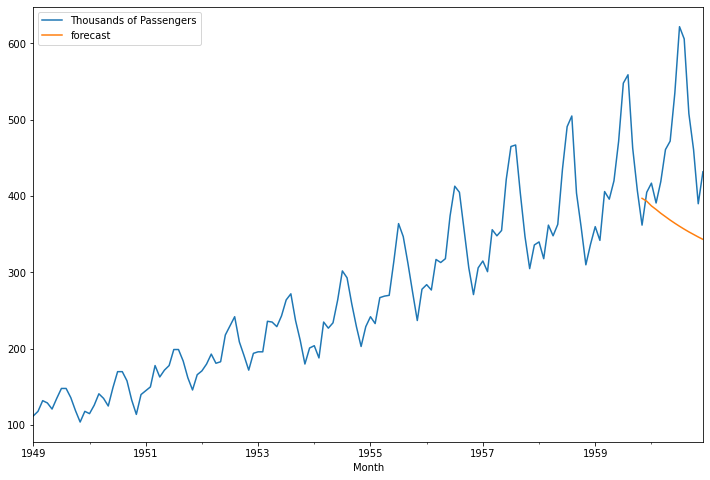

In [85]:
df['forecast']=model_fit.predict(start=130,end=144,dynamic=True)
df[['Thousands of Passengers','forecast']].plot(figsize=(12,8))

# 6) SARIMAX Model:

In [89]:
model=sm.tsa.statespace.SARIMAX(df['Thousands of Passengers'],order=(2,0,1),seasonal_order=(2,0,1,12))
results=model.fit()

C:\Users\Josh\anaconda3\envs\SignLangauge\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Josh\anaconda3\envs\SignLangauge\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Josh\anaconda3\envs\SignLangauge\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<AxesSubplot:xlabel='Month'>

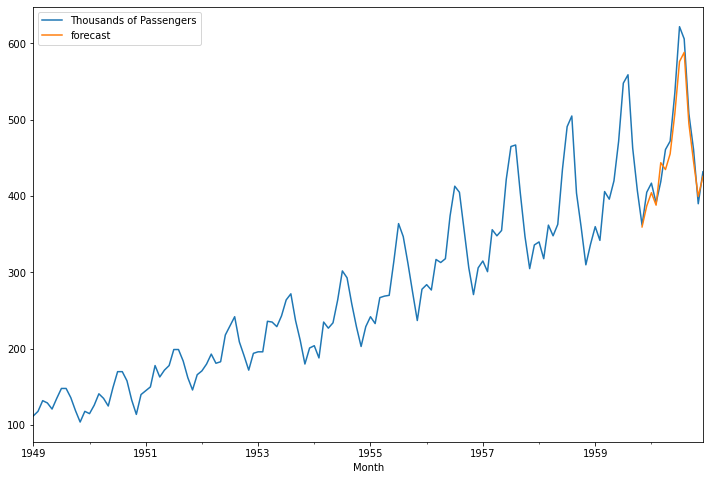

In [90]:
df['forecast']=results.predict(start=130,end=144,dynamic=True)
df[['Thousands of Passengers','forecast']].plot(figsize=(12,8))

## Future forecasting based on SARIMA predictions:

In [91]:
# create future dates for forecasting

from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_dates

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00')]

In [92]:
# create dataset with future dates as index and same column as the original dataframe
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
# concatenate the new future df and the original df
future_df=pd.concat([df,future_datest_df])

future_df

,Thousands of Passengers,second difference,forecast,seasonal difference
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,NaN,NaN,NaN
1949-03-01,132.0,20.0,NaN,NaN
1949-04-01,129.0,11.0,NaN,NaN
1949-05-01,121.0,-11.0,NaN,NaN
...,...,...,...,...
1962-07-01,NaN,NaN,NaN,NaN
1962-08-01,NaN,NaN,NaN,NaN
1962-09-01,NaN,NaN,NaN,NaN
1962-10-01,NaN,NaN,NaN,NaN


<AxesSubplot:>

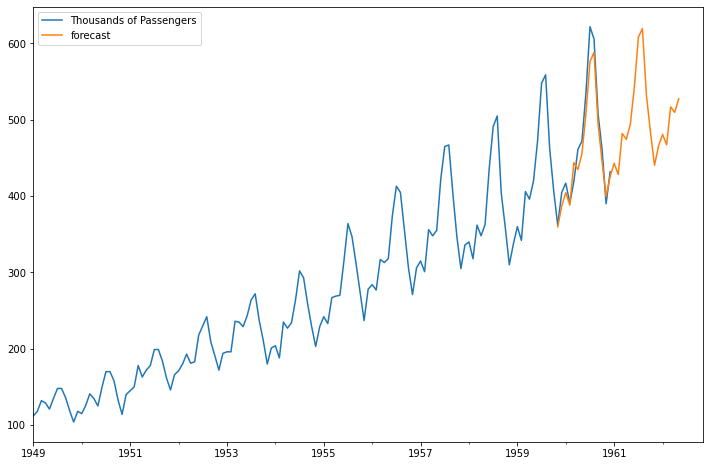

In [95]:
# using the future dates, we can now forecast
future_df['forecast'] = results.predict(start = 130, end = 160, dynamic= True)  
future_df[['Thousands of Passengers', 'forecast']].plot(figsize=(12, 8))